In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score 

In [2]:
X,y,c = make_blobs(n_samples=500,cluster_std=0.8,centers=4, n_features=2, return_centers=True)

df_blobs = pd.DataFrame(
    {   
    'x1':X[:,0],
    'x2':X[:,1],

    }
)
df_centers = pd.DataFrame(
    {
     'x1':c[:,0],
     'x2':c[:,1],
    }
)

In [3]:
X_m,y_m, = make_moons(n_samples=250,noise=0.05, random_state=42)

df_moons = pd.DataFrame(
    {   
    'x1':X_m[:,0],
    'x2':X_m[:,1], 
    }
)


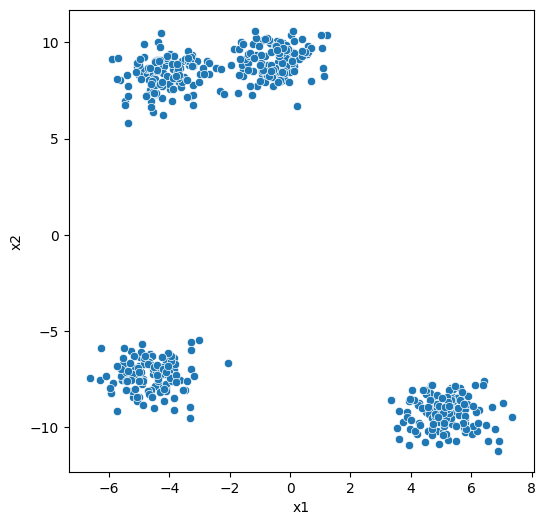

In [4]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(data=df_blobs,x='x1', y='x2')
plt.show()

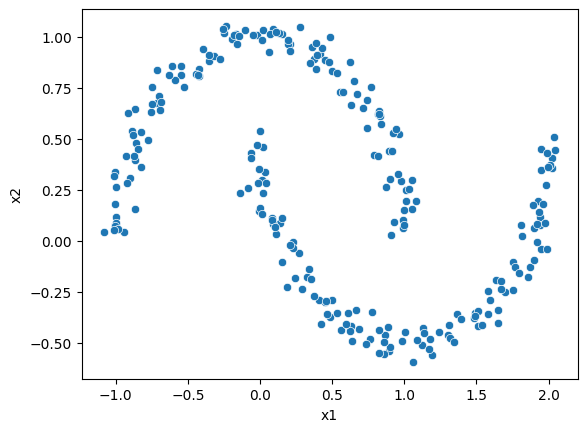

In [5]:
sns.scatterplot(data=df_moons, x='x1',y='x2')
plt.show()

## Aplicar BDSCAN

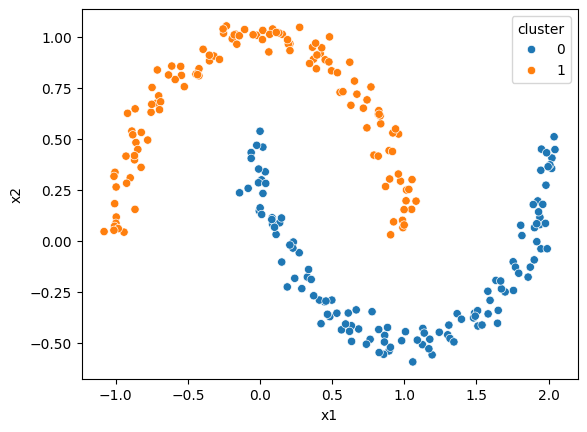

In [6]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=4)
y_m_predict = dbscan_cluster.fit_predict(X_m)
df_moons['cluster'] = y_m_predict
sns.scatterplot(data=df_moons,x='x1', y='x2', hue='cluster')
plt.show()

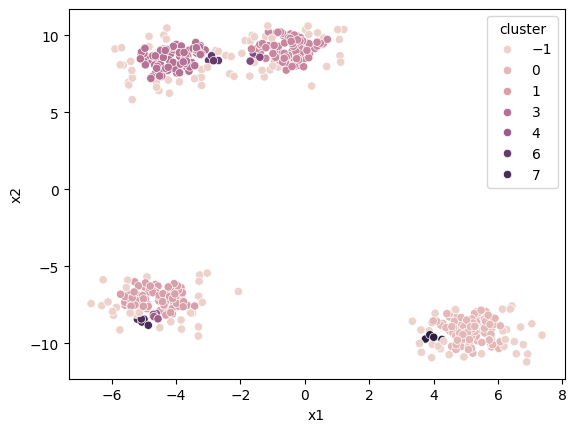

In [7]:
dbscan = DBSCAN(eps=0.5, min_samples=4)

y_predict = dbscan_cluster.fit_predict(X)
df_blobs['cluster'] = y_predict
sns.scatterplot(data=df_blobs,x='x1', y='x2', hue='cluster')
plt.show()

In [20]:
from sklearn.neighbors import NearestNeighbors


In [28]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

In [29]:
distances

array([[0.        , 0.11965466, 0.12888076],
       [0.        , 0.12888076, 0.17606301],
       [0.        , 0.07292836, 0.08862723],
       ...,
       [0.        , 0.02260301, 0.15340529],
       [0.        , 0.35147413, 0.39293321],
       [0.        , 0.04895947, 0.14728324]])

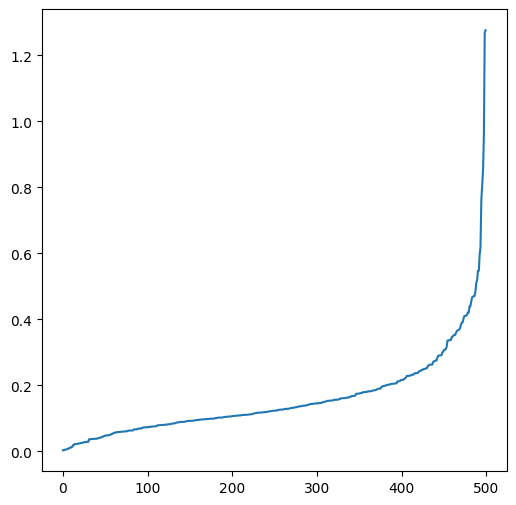

In [30]:
fig = plt.figure(figsize=(6,6))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [31]:
eps_values = np.arange(0.25,0.8,0.1)
min_samples = np.arange(2,10)

In [34]:
from itertools import product

In [44]:
dbscan_params = list(product(eps_values, min_samples))

sil_scores = []

for p in dbscan_params:
    y_pred = DBSCAN(eps = p[0], min_samples = p[1]).fit_predict(X)
    sil_scores.append(silhouette_score(X, y_pred))

In [45]:
df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns=['eps', 'min_samples'])
df_params_tunning['sil_scores'] = sil_scores


In [47]:
pivot_data = pd.pivot_table(df_params_tunning, index='min_samples', columns='eps', values='sil_scores')
pivot_data

eps,0.25,0.35,0.45,0.55,0.65,0.75
min_samples,,,,,,
2,-0.101258,0.038666,-0.119058,0.028208,0.213162,0.802426
3,-0.086973,0.299293,0.108751,0.250695,0.368036,0.802426
4,-0.174303,0.388346,0.601924,0.739999,0.756661,0.783248
5,-0.199945,0.469728,0.591446,0.699342,0.751662,0.772427
6,-0.228094,0.193250,0.575839,0.696430,0.739812,0.779686
7,-0.450137,0.158638,0.541688,0.627220,0.729544,0.762156
8,-0.577502,0.077005,0.513973,0.614942,0.708672,0.764903
9,-0.506779,0.016746,0.485506,0.611785,0.698423,0.764903


<Axes: xlabel='eps', ylabel='min_samples'>

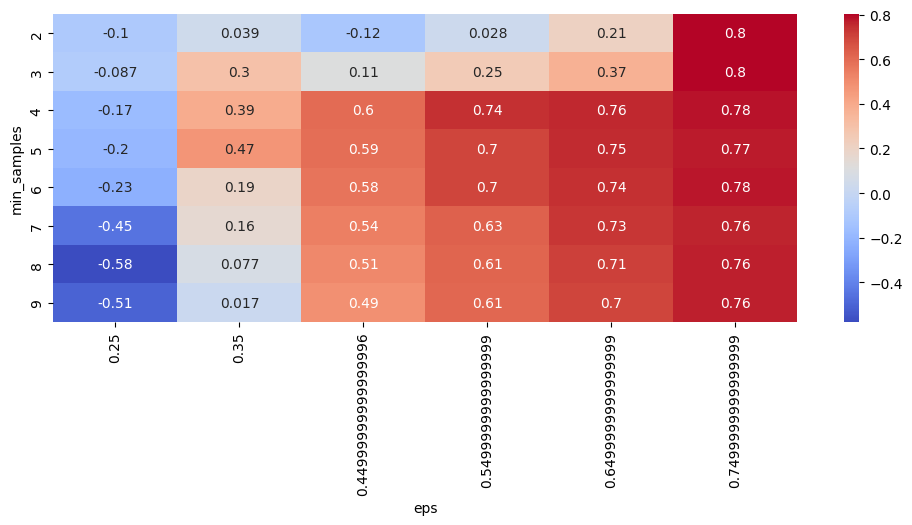

In [55]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(pivot_data, annot=True, annot_kws={'size': 10}, cmap='coolwarm', ax=ax)

## evaluando DBSCAN

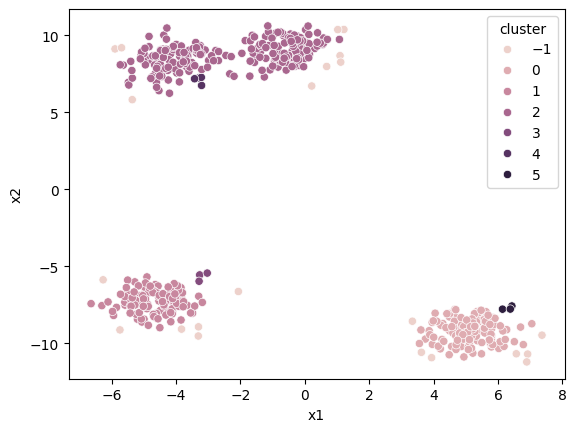

In [ ]:
dbscan_cluster = DBSCAN(eps = 0.5, min_samples = 3)
y_pred = dbscan_cluster.fit_predict(X)

df_blobs['cluster'] = y_pred



sns.scatterplot(data=df_blobs,x='x1', y='x2', hue='cluster')
plt.show()




For n_clusters = 7 The average silhouette_score is : 0.1364476288353363


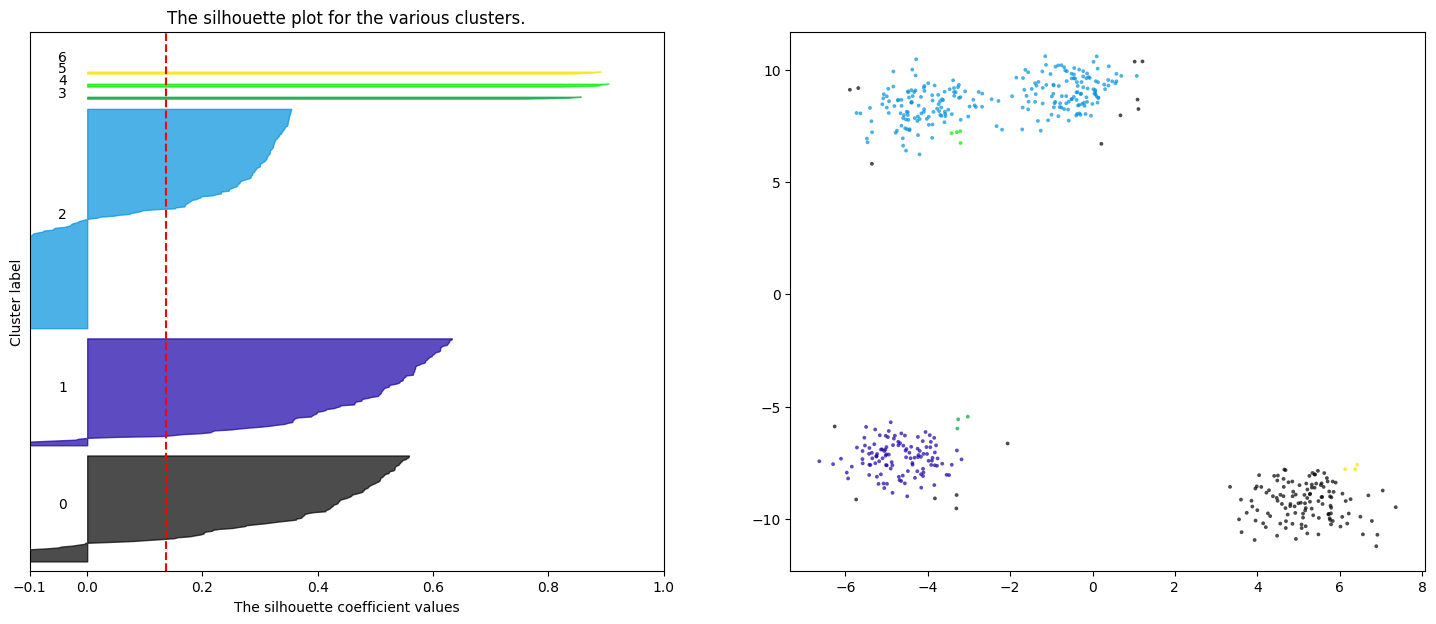

In [59]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score



# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = DBSCAN(eps = 0.5, min_samples = 3)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])



# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)



plt.show()